## **Data Preprosessing → Dataprep（可視化ライブラリ）**

このプログラムは、**データ分析の前に必要なデータトリートメントをPythonで実行し、データを可視化する**ものです。

Pythonは、規模の大きなデータセットであっても数分で可視化結果をアウトプットしてくれるライブラリが充実しており、データ概観に有効です。
ただ、現実データは、異常データの混入、データ型の混在、カテゴリーデータの変換、欠損値の処理など、データ分析を行う以前の課題が数多くありますので、これらに対処し、スムーズに可視化を行うことをいとしています。

トリートメントの必要がないデータセットは、前処理をスキップし、可視化のみを行うこともできます。また、機械学習でよく利用されるデータセットをロードできるようにしていますので、データがない場合でも使用感含めた確認ができます。


<details><summary>Data Preprosessing（前処理）について</summary><div>

これは、データに含まれる文字データや欠損値の置換など、データ分析の**前処理**を行い、その後、**基本統計量や可視化**を行うものです。
欠損値や異常データは削除せずに、可能な限りわかる形で残すことを基本としています。実行できる前処理は、以下です。
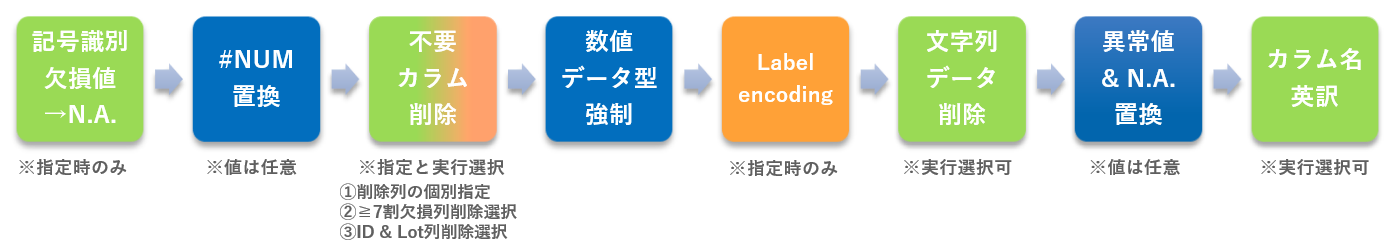

<details><summary>[使用方法]</summary><div>

- **基本的には、上から順に実行するようにしてください。**
- **異常データ**の数値置換は[**-99**]、**NAデータ**は[**-1**]をデフォルトとしています。別の数値にする場合は任意に設定してください。
- 前処理が問題なく実行出来たら、**DataPrep html Report Output**を実行してください。保存したhtmlを起動するとデータ可視化、操作ができます。
- 前処理後のデータで別の分析を行う場合は**前処理結果 csv出力**を実行してください。csvデータを保存することができます。


<details><summary>[追記]</summary><div>

- Uploadするデータに欠損値がなく、かつすべて数値データである場合、これら前処理は実行の対象となりませんので何も影響はありません。
- ラベルエンコーディングは、例えば [優] [良] [可] [不可] を [0] [1] [2] [3] とする処理です。数値は 0～ 割り振られます。該当の前処理セル実行後、[優、良、可]等と表示されます。[優, 良, 可]＝[0, 1, 2] という対応になります。
- カテゴリーデータに含まれるNA以外の異常値は判定できませんので、異常な値もカテゴリー化されます。これはデータで判断してください。
- カテゴリーデータのエンコーディングは、決定木モデルでの解析を意識し、ラベルエンコーディングのみとしています。他のモデルで分析する場合、適切ではないこともあります。

In [1]:
#@title Select_Dataset { run: "auto" }
#@markdown  **<font color= "Crimson">注意</font>：かならず 実行する前に 設定してください。**</font>

dataset = 'Titanic :binary' #@param ['Boston_housing :regression', 'Diabetes :regression', 'Breast_cancer :binary','Titanic :binary', 'Iris :classification', 'Loan_prediction :binary', 'Upload']



<details><summary>dataset について : 
データをアップロードする場合は [ Upload ]を選択してください。Boston_housing :regression / Diabetes :regression / Breast_cancer :binary / Titanic :binary / Iris :classification / Loan_prediction :binary はデータセットサンプルです。</summary><div>

- Boston_housing :regression　← ボストン市郊外の「犯罪発生率」や「広い部屋の割合」等と「住宅価格」の回帰データ。欠損値なし。すべてのカラムが数値のデータ。

- Diabetes :regression　← 糖尿病患者の「年齢」「性別」と「8項目の診断データ」と「1年後の進行度（数値）」の回帰データ。欠損値なし。「8項目の診断データ」は標本平均と標本分散で標準化（平均0, 標準偏差1）されている。

- Breast_cancer :binary　← 乳がんのさまざまな「診断データ」と「陽性・陰性（陽性:1, 陰性:0）」の二値分類データ。欠損値なし。すべてのカラムが数値のデータ。

- Titanic :binary　← タイタニック号 乗客者の「性別」「年齢」「チケットクラス」等と「生存情報（Survived）」のデータ。Survived：0（死亡）,1（生存）の二値分類。欠損値があり、文字列のカラムも複数あるデータ。

- Iris :classification　← 「がく片」「花びらの幅」「長さ」と「3種類のアヤメ [Setosa, Virginia, Versicolor]」 の分類データ。欠損値なし。分類データである [Setosa, Virginia, Versicolor] は文字データ。

- Loan_prediction :binary　←　住宅ローン顧客の「性別」「配偶者の有無」「学歴」「扶養家族の数」「収入」「融資額」「クレジットヒストリー」などの情報と「ローン承認のStatus：Loan_Status(Y/N)」の二値分類データ。欠損値があり、文字列カラムも複数あるデータ。分類データである「Loan_Status」も 文字データ[Y,N] となっている。

- Upload　← 任意のデータセットを読み込む場合はこれを選択してください。


### ライブラリのインストール

In [2]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 9.1 MB/s 
     |████████████████████████████████| 1.0 MB 38.8 MB/s 
     |████████████████████████████████| 965 kB 40.2 MB/s 
     |████████████████████████████████| 78 kB 7.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 101 kB 12.9 MB/s 
     |████████████████████████████████| 28.5 MB 1.4 MB/s 
     |████████████████████████████████| 749 kB 53.0 MB/s 
     |████████████████████████████████| 133 kB 62.4 MB/s 
     |████████████████████████████████| 943 kB 46.4 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 141 kB 64.8 MB/s 
     |████████████████████████████████| 232 kB 64.4 MB/s 
     |████████████████████████████████| 96 kB 7.1 MB/s 
     |██████████████████████

In [3]:
!pip install googletrans==4.0.0-rc1 --quiet

     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 1.4 MB 59.9 MB/s 
     |████████████████████████████████| 65 kB 4.4 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 


### Load dataset



In [4]:
#@title Load dataset

#ライブラリインポート
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


if dataset =='Upload':
  from google.colab import files
  uploaded = files.upload()#Upload
  target = list(uploaded.keys())[0]
  df = pd.read_csv(target)

elif dataset == "Diabetes :regression":
  from sklearn.datasets import load_diabetes
  dataset = load_diabetes()
  df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
  df["target"] = dataset.target

elif dataset == "Breast_cancer :binary":
  from sklearn.datasets import load_breast_cancer
  dataset = load_breast_cancer()
  df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
  df["target"] = dataset.target

elif dataset == "Titanic :binary":
  data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
  df = pd.read_csv(data_url)
  X = df.drop(['Survived'], axis=1) # 目的変数を除いたデータ
  y = df['Survived'] # 目的変数
  df = pd.concat([X, y], axis=1)

elif dataset == "Iris :classification":
  from sklearn.datasets import load_iris
  dataset = load_iris()
  df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
  df["target"] = dataset.target

elif dataset == "Loan_prediction :binary":
  data_url = "https://github.com/shrikant-temburwar/Loan-Prediction-Dataset/raw/master/train.csv"
  df = pd.read_csv(data_url)

else:
  from sklearn.datasets import load_boston
  dataset = load_boston()
  df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
  df["target"] = dataset.target

#X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#y = pd.Series(dataset.target, name='target')

source = df.copy()

FEATURES = df.columns[:-1]
TARGET = df.columns[-1]
X = df.loc[:, FEATURES]
y = df.loc[:, TARGET]

df.info(verbose=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
#@title Datasetの数字・文字列区分

numerical_col = []
Object_col = []

for col_name, item in df.iteritems():
    if item.dtype == object:
        Object_col.append(col_name)
    else:
        numerical_col.append(col_name)
        
print('-----------------------------------------------------------------------------------------')
print('Numerical_columns:', numerical_col)
print('-----------------------------------------------------------------------------------------')
print('Object_columns:', Object_col)
print('-----------------------------------------------------------------------------------------')
print('※ 前処理でカラムを指定する場合は、上記に表示されたカラムを Copy & Paste するとよい')

-----------------------------------------------------------------------------------------
Numerical_columns: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
-----------------------------------------------------------------------------------------
Object_columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
-----------------------------------------------------------------------------------------
※ 前処理でカラムを指定する場合は、上記に表示されたカラムを Copy & Paste するとよい


### 前処理 選択･実行
- オレンジの前処理は、列を指定した場合のみ実行されます。
- グリーンの前処理は、☑ ⇔ □ で実行する／しない を選択できます。
- ブルーの前処理は、自動実行されます。置換する値は任意に変更できます。


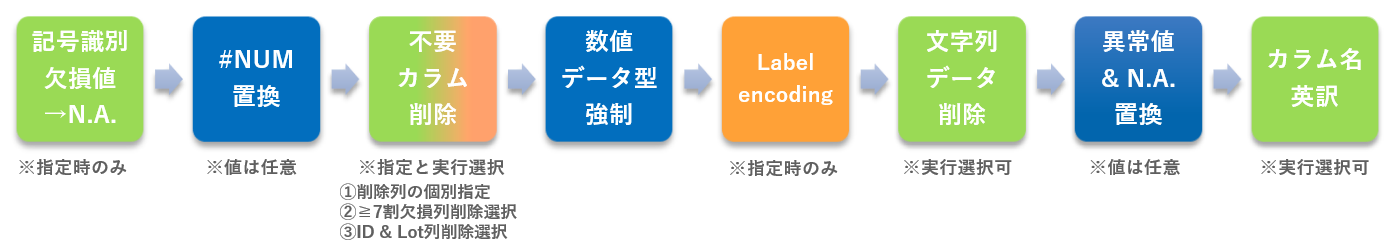

**✓記号識別した欠損データをnanに置換** について

通常、欠損値＝セルに何もデータがない状態 となりますが、欠損であることを識別するために「N.A」や「---」等の識別記号が入力されている場合があります。

識別記号がある場合、Pythonはこれらを欠損データ（nan）と認識せず、文字と認識してしまいますので、識別記号を**missing_value_symbol_is**に入力し、nanに置換する処理を行います。

欠損データを記号で識別していない場合は、**missing_value_to_nan** の☑を外せば、この処理はスルーされます。



In [6]:
#@title 記号識別した欠損データをN.A.(nan)に置換（☑ ＝実行）
#@markdown  ※missing_value_to_nan を☑すると、missing_value_symbol_is で指定した欠損記号をnanに置換します
missing_value_to_nan = False #@param {type:"boolean"}
missing_value_symbol_is = '---' #@param {type:"raw"}

#各列ごとに、6割欠損がある列を削除
if missing_value_to_nan == True:
  df = df.replace(missing_value_symbol_is, np.nan)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**✓#NUM! を指定番号に置換** について

Excelでのデータ変換などにおいて計算不能となったセルにおける表示。
元データが異常であるために NUM! 表示となったものであり、これは nanデータではなく、異常データとして扱うべきデータとなる。

Pythonは NUM! を文字として認識しますので、指定番号に置換する処理を行います。
**Replace_number** に置換したい数値を入力し、置換する処理を行います。

In [7]:
#@title NUM!を指定番号に置換
#@markdown  **<font color= "Crimson">注意</font>：指定は <u> 数値 </u> としてください。**

Replace_number = -99 #@param {type:"raw"}

df = df.replace('#NUM!', Replace_number)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**不要カラムの削除について**

カラム削除は3通りの処理を設けています。①カラム名を指定し削除、②7割以上が欠損値のカラム削除、③ID･Lotを含むカラム削除 です。①はカラム名を個別指定、②③は☑で実行となります。

<details><summary>不要カラム処理の説明</summary><div>

**✓カラム名を指定し削除** について

Numerical_columnsは数値データ、Object_columnsは文字データです。

Object_columnsには「文字で区分されたカテゴリーデータ」と「数値データに文字が混在したデータ」が混在している可能性があり、分析に影響しない「文字で区分されたカテゴリーデータ」が、次の『指定したカラムを削除』の対象になります。

　

**✓7割以上が欠損値のカラム削除** について

データの7割が欠損しているカラム＝分析の役に立たないとし、カラムを消すという処理です。

ただ、あえてnanとして残しておきたいということもあるでしょう。
※**Over_70percent_missing_value_is_drop**の☑を外せば、この処理はスルーされます。

　

**✓ID･Lotを含むカラム削除** について

データ分析において、時系列や個体識別を意識する場合、ID、Lotは有効ですが、説明変数間や目的変数との関係性を主とする場合、ID、Lotカラムは不要です。

この処理は、カラム名にID、Lotという表記（大文字･小文字によらず）がある場合、カラムを削除する処理です。

※**Drop_ID_label**の☑を外せば、この処理はスルーされます。

In [8]:
#@title 不要カラムの削除（カラム名を指定し削除｜7割以上が欠損値のカラム削除☑｜ID･Lotを含むカラム削除☑）
#@markdown  **<font color= "Crimson">注意</font>：Drop_label_is（カラムを指定して削除）の記載は <u> ' ID ' , ' Age '  </u> などとしてください。**</font>
Drop_label_is =  'Name', 'Ticket', 'Cabin'#@param {type:"raw"}

try:
  if Drop_label_is is not "":
    Drop_label_is = pd.Series(Drop_label_is)
    print('-----------------------------------------------------------------------------------------')
    print("Drop of specified column:", Drop_label_is.values)
    df.drop(columns=list(Drop_label_is),axis=1,inplace=True)
  else:
    print('※削除カラムの指定なし→処理スキップ')
except:
    print("※正常に処理されませんでした。入力に誤りがないか確認してください。")

#@title データの7割以上が欠損値のカラムを削除（☑ ＝実行）
Over_70percent_missing_value_is_drop = True #@param {type:"boolean"}

#各列ごとに、7割欠損がある列を削除
if Over_70percent_missing_value_is_drop == True:
  for col in df.columns:
    nans = df[col].isnull().sum()  # nanになっている行数をカウント

    # nan行数を全行数で割り、7割欠損している列をDrop
    if nans / len(df) > 0.7: 
        # 7割欠損列を削除
        print('-----------------------------------------------------------------------------------------')
        print("Drop of missing 70% column:", col)
        df.drop(col, axis=1, inplace=True)    
#    else:
#      print(col,'：OK ⇒ 処理スキップ')

#@title カラム名に [ID] [Lot] を含まれる場合、削除（☑ ＝実行）
Drop_ID_label = True #@param {type:"boolean"}

include_list = df.columns[df.columns.str.contains('ID|Lot',case=False)]

if Drop_ID_label == True:
  if include_list is not "":
    df.drop(columns=list(include_list),axis=1,inplace=True)
    print('-----------------------------------------------------------------------------------------')
    print("Drop of ID&Lot column:", list(include_list))

print('-----------------------------------------------------------------------------------------')

df.head()


-----------------------------------------------------------------------------------------
Drop of specified column: ['Name' 'Ticket' 'Cabin']
-----------------------------------------------------------------------------------------
Drop of ID&Lot column: ['PassengerId']
-----------------------------------------------------------------------------------------


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


**✓数値変換の取りこぼし対応：Objectカラムをfloatに変換** について

数値カラムから、nan識別記号を取り除き、#NUM!を数値置換しても、intとfloatが混在している場合等において「objectデータ」と認識される場合があります。

この処理は、数値カラムを数値と認識させるため、強制的にfloatに変換する処理です。


In [9]:
#@title 数値変換の取りこぼし対応：Objectカラムをfloatに変換

#Object_to_float = True #@param {type:"boolean"}

'''
try:
  if Object_to_float == True:
    for col in Object_col:
      print(col)
      df[col] = df[col].astype('float64')
#    else:
#      print('skip')

except:
  print('end')
'''

print('■変換結果','\n')
for col in Object_col:
  try:
    df[col] = df[col].astype('float64')
    print('✓',col,'→ change')
  except:
    print('✓',col,'→ skip')


■変換結果 

✓ Name → skip
✓ Sex → skip
✓ Ticket → skip
✓ Cabin → skip
✓ Embarked → skip


In [10]:
#@title ここまでの前処理の確認
#@markdown  **※Object_columnsに数値カラムが残っていなければOKです。**

numerical_col = []
Object_col = []

for col_name, item in df.iteritems():
    if item.dtype == object:
        Object_col.append(col_name)
    else:
        numerical_col.append(col_name)
        
print('-----------------------------------------------------------------------------------------')
print('Numerical_columns:', numerical_col)
print('-----------------------------------------------------------------------------------------')
print('Object_columns:', Object_col)
print('-----------------------------------------------------------------------------------------')
print('※ 前処理でカラムを指定する場合は、上記に表示されたカラムを Copy & Paste するとよい')

-----------------------------------------------------------------------------------------
Numerical_columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
-----------------------------------------------------------------------------------------
Object_columns: ['Sex', 'Embarked']
-----------------------------------------------------------------------------------------
※ 前処理でカラムを指定する場合は、上記に表示されたカラムを Copy & Paste するとよい


**✓指定カラムを Labelエンコード** について

データセットに、カテゴリーデータがあり、これを分析に利用したいという場合、カテゴリーを数値に変換する必要があります。

[NG,OK]で区分した検査結果等のことをカテゴリーデータといい、{NG: 0, OK: 1} のようにエンコードする処理です。

例えば、検査結果のカラム名が result である場合、**Object_label_to_encode_is** に 'result' と入力し、実行してください。（複数カラムを選択できます）

実行後、エンコードの結果とデータセットの先頭5行が表示されます。

In [11]:
#@title 指定カラムを Labelエンコード
#@markdown  **<font color= "Crimson">注意</font>：指定は <u> ' ID ' , ' Age ' , </u> などとしてください。**
Object_label_to_encode_is = 'Sex', 'Embarked' #@param {type:"raw"}
Object_label_to_encode_is = pd.Series(Object_label_to_encode_is)

from sklearn.preprocessing import LabelEncoder

encoders = dict()

try:
  for i in Object_label_to_encode_is:
    if Object_label_to_encode_is is not "":
      series = df[i]
      le = LabelEncoder()
      df[i] = pd.Series(
        le.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
        )
      encoders[i] = le
      print('-----------------------------------------------------------------------------------------')
      print('[エンコードカラム]：',i)
      le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
      print(le_name_mapping)
    else:
      print('skip')

except:
    print("※正常に処理されなかった場合は入力に誤りがないか確認してください。")
print('-----------------------------------------------------------------------------------------') 
df.head()
#https://stackoverflow.com/questions/54444260/labelencoder-that-keeps-missing-values-as-nan

-----------------------------------------------------------------------------------------
[エンコードカラム]： Sex
{'female': 0, 'male': 1}
-----------------------------------------------------------------------------------------
[エンコードカラム]： Embarked
{'C': 0, 'Q': 1, 'S': 2}
-----------------------------------------------------------------------------------------


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2.0,0
1,1,0,38.0,1,0,71.2833,0.0,1
2,3,0,26.0,0,0,7.9250,2.0,1
3,1,0,35.0,1,0,53.1000,2.0,1
4,3,1,35.0,0,0,8.0500,2.0,0


**✓すべての文字列データを削除** について

ここまでで、分析したい数値カラムとカテゴリーカラムの一次処理が完了したことになります。

ラベルエンコードの対象とせずに残っている文字列だけのデータを削除する場合は、この処理を実行してください。

**Exclude_Object** の☑を外せば、この処理はスルーされます。



In [12]:
#@title すべての文字列データを削除（☑ ＝実行）
Exclude_Object = True #@param {type:"boolean"}

#数値の列は残し、文字列だけを削除
if Exclude_Object == True:
  df = df.select_dtypes(exclude='object')

df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2.0,0
1,1,0,38.0,1,0,71.2833,0.0,1
2,3,0,26.0,0,0,7.9250,2.0,1
3,1,0,35.0,1,0,53.1000,2.0,1
4,3,1,35.0,0,0,8.0500,2.0,0


**異常データ・NAデータの数値置換について**

異常データは数値カラムに混在した文字データ、NAデータは欠損値です。
異常や欠損であることを識別し、かつデータ分析を可能にするための処理です。

<details><summary>異常データ・NAデータの数値置換処理の説明</summary><div>


**✓異常なobjectデータを指定番号に置換** について

この処理は、異常な文字データを指定番号に置換する処理です。
**Replace_number** に置換したい数値を入力し、置換する処理を行います。

**✓NAデータを指定番号に置換** について

この処理は、NAデータを指定番号に置換する処理です。

**Replace_from_NA_to_number** に置換したい数値を入力し、置換する処理を行います。

デフォルトでは、置換する値を -1 としています。カテゴリーエンコーディングは 0,1,2… で行われますので、これとの重複を避けることを意図しています。ただ、数値データとの重複が考えられるなどの場合は任意に変更してください。

In [13]:
#@title 異常データ・NAデータの数値置換
#@markdown  **<font color= "Crimson">注意</font>：異常データ(abnomal_data)とNAデータの置換<u> 数値 </u> を指定してください。**

Replace_abnormal_data_to_number = -99 #@param {type:"raw"}

import string

for i in df.columns:
  for data in df[i]:
    try:
      if data.isdigit() == False:
        df[i].replace(data, Replace_abnormal_data_to_number,inplace=True)
    except:
      #print('skip：',i,data)
      pass

#N.Aデータ を指定番号に置換

Replace_from_NA_to_number = -1 #@param {type:"raw"}

for col in df.columns:
  if df[col].dtypes is not ( "int64"  or  "float64") :
    df[col] = df[col].fillna(Replace_from_NA_to_number)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2.0,0
1,1,0,38.0,1,0,71.2833,0.0,1
2,3,0,26.0,0,0,7.9250,2.0,1
3,1,0,35.0,1,0,53.1000,2.0,1
4,3,1,35.0,0,0,8.0500,2.0,0


In [14]:
#@title ここまでの前処理の確認

numerical_col = []
Object_col = []

for col_name, item in df.iteritems():
    if item.dtype == object:
        Object_col.append(col_name)
    else:
        numerical_col.append(col_name)
        
print('-----------------------------------------------------------------------------------------')
print('Numerical_colomn:', numerical_col)
print('-----------------------------------------------------------------------------------------')
print('Object_colomn:', Object_col)
print('-----------------------------------------------------------------------------------------')


-----------------------------------------------------------------------------------------
Numerical_colomn: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
-----------------------------------------------------------------------------------------
Object_colomn: []
-----------------------------------------------------------------------------------------


**✓カラム名を英訳** について

この処理は、文字通りカラム名を英訳する処理です。

データ分析のライブラリに依存しますが、英語以外では文字化けする場合があり、これに対応させることを意図しています。

**Column_English_translation** の☑を外せば、この処理はスルーされます。


In [ ]:
#@title カラム名を英訳（☑ ＝実行）
Column_English_translation = False #@param {type:"boolean"}

from googletrans import Translator

if Column_English_translation == True:

  eng_columns = {}
  columns = df.columns
  translator = Translator()
  
  for column in columns:
    eng_column = translator.translate(column).text
    eng_column = eng_column.replace(' ', '_')
    eng_columns[column] = eng_column
    df.rename(columns=eng_columns, inplace=True)

print('-----------------------------------------------------------------------------------------')
print('[カラム名_翻訳結果（翻訳しない場合も表示）]')
print('-----------------------------------------------------------------------------------------') 
df.head(0)

-----------------------------------------------------------------------------------------
[カラム名_翻訳結果（翻訳しない場合も表示）]
-----------------------------------------------------------------------------------------


,安全消费电流,是否点检器判断,SW出货位置确认,EEPROM初始化,B Block CRC写入1,B Block CRC写入2,fOSC1,fOSC2,fOSC3,Write Fosc Data1,...,噪声测试10,噪声测试11,噪声测试12,噪声测试13,噪声测试14,噪声测试15,感度数据备份,testinput输入,結果,result


In [15]:
#@title 前処理の最終確認

numerical_col = []
Object_col = []

for col_name, item in df.iteritems():
    if item.dtype == object:
        Object_col.append(col_name)
    else:
        numerical_col.append(col_name)
        
print('-----------------------------------------------------------------------------------------')
print('Numerical_colomn:', numerical_col)
print('-----------------------------------------------------------------------------------------')
print('Object_colomn:', Object_col)
print('-----------------------------------------------------------------------------------------')

if df.isnull().values.sum()==0:
  print('[NA処理判定]')
  print('◎：欠損値はありません')
else:
  print('-----------------------------------------------------------------------------------------')
  print('[NA処理判定]')
  print('×：欠損値が',df.isnull().values.sum(),'つあります')

print('※各カラムのデータ型が[float64]か[int64]なら正しく処理されています')
print('-----------------------------------------------------------------------------------------')

df.info(verbose=True)

-----------------------------------------------------------------------------------------
Numerical_colomn: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
-----------------------------------------------------------------------------------------
Object_colomn: []
-----------------------------------------------------------------------------------------
[NA処理判定]
◎：欠損値はありません
※各カラムのデータ型が[float64]か[int64]なら正しく処理されています
-----------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
 7   Surviv

### Visualization & csv output

In [ ]:
#@title Visualization Report Output
#create_report(df)

from dataprep.eda import create_report
from dataprep.datasets import load_dataset
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff

report = create_report(df)
report.save('DataPrep_Report')

from google.colab import files
files.download( "/content/DataPrep_Report.html" ) 

Report has been saved to DataPrep_Report.html!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title 前処理結果（異常値･欠損値置換） csv出力（☑ ＝実行）

csv_output = True #@param {type:"boolean"}

#csv出力
if csv_output == True:
  df.to_csv('after_prepro_data.csv',encoding='utf_8_sig',index=False)
  from google.colab import files
  files.download('after_prepro_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title 前処理（異常値･NAカット）結果 csv出力（☑ ＝実行）

csv_output_cut_ver = False #@param {type:"boolean"}

#Replace_number(default：-99)含む行を削除

df2 = df.copy()

def remove_any_xx_row(df2):
#  df2 = df.copy()
  for row in df2.index:
    if (df2.loc[row] == Replace_number).any():
      df2.drop(row, axis=0, inplace=True)
  return df2
    
#df2 = remove_any_xx_row(df)

#Replace_from_NA_to_number(default：-1)含む行を削除
def remove_any_na_row(df2):
#  df2 = df2.copy()
  for row in df2.index:
    if (df2.loc[row] == Replace_from_NA_to_number).any():
      df2.drop(row, axis=0, inplace=True)
  return df2

#df2 = remove_any_na_row(df)
#df2.head()

#csv出力
if csv_output_cut_ver == True:
  df2.to_csv('after_prepro_data_cut_ver.csv',encoding='utf_8_sig',index=False)
  from google.colab import files
  files.download('after_prepro_data_cut_ver.csv')

In [ ]:
#@title 前処理（異常値置換･NA維持）結果 csv出力（☑ ＝実行）

csv_output_nan_ver = False #@param {type:"boolean"}

#NA置換値をnanに
df3 = df.copy()
df3 = df3.replace(Replace_from_NA_to_number, np.nan)

#csv出力
if csv_output_nan_ver == True:
  df3.to_csv('after_prepro_data_nan_ver.csv',encoding='utf_8_sig',index=False)
  from google.colab import files
  files.download('after_prepro_data_nan_ver.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Visualization Report **cut_ver.** Output（☑ ＝実行）

cut_ver_html_output = False #@param {type:"boolean"}

#create_report(df)
report = create_report(df2)
report.save('DataPrep_Report_cut_ver')

if cut_ver_html_output == True:
  from google.colab import files
  files.download( "/content/DataPrep_Report_cut_ver.html" ) 

Report has been saved to DataPrep_Report_cut_ver.html!


In [ ]:
#@title Visualization Report **nan_ver.** Output（☑ ＝実行）

nan_ver_html_output = False #@param {type:"boolean"}

#create_report(df)
report = create_report(df3)
report.save('DataPrep_Report_nan_ver')

if nan_ver_html_output == True:
  from google.colab import files
  files.download( "/content/DataPrep_Report_nan_ver.html" ) 

Report has been saved to DataPrep_Report_nan_ver.html!


### Note

https://stackoverflow.com/questions/54444260/labelencoder-that-keeps-missing-values-as-nan

In [ ]:
#@title 参考：16進数カラムを指定、10進数に変換（☑ ＝実行）
#@markdown  **<font color= "Crimson">注意</font>：指定は <u> ' ID ' , ' Age '  </u> などとしてください。**</font>

HEX2INT = 'IF1hoseiti', 'IF2hoseiti' #@param {type:"raw"}
HEX2INT = pd.Series(HEX2INT)

'''
import string
for i in HEX2INT:
  if df[i].dtype == 'object':
    for x in df[i]:
      try:
        if set(x).issubset(set(string.hexdigits)) ==True:
          df[i].replace(x, int(x, 16),inplace=True)
      except:
#        print('skip：',i,x)
        pass
df.head()
'''